
# Palmer Penguins



This notebook contains my analysis of the famous palmer penguins dataset.


![Palmer Penguins Image](https://allisonhorst.github.io/palmerpenguins/logo.png)

# Overview
This project is based on the palmer penguins dataset.  The dataset is available [on GitHub] (https://allisonhorst.github.io/palmerpenguins/) . It contains data for 344 penguins. There are 3 different species of penguins, collected from 3 different islands on the Palmer Archipelago, Antarctica. In this section we import the dataset and give an overview.
The data set contains two different types of variables - Categorical and Numerical which we look at in more detail below. The variables are categorical(species, island and sex) and numerical(bill length and depth, flipper length and body mass).

In [1]:
# Data frames
import pandas as pd

## Imports 
***
We use pandas for the DataFrame data structure. It allows us to investigate CSV files , amongst other features.

Matplotlib is used for data visualization, typically in the form of plots, graphs and charts.

Seaborn library used for visualizing the explorative statistical plots of data.

NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data. 

Warnings, we tell Panda to ignore future warning message generated by Pandas

In [2]:
# Load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [3]:
# Let's have a look 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# Look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

## Data Types

This section will discuss the different types of variables that should be used to model the variables in the data set.
What is a data type - It is an attribute associated with a piece of data that tells a computer how to interpret its value.
The most common types of data are numerical, Strings, Sequences(lists, tuple, range), Booleans(True/False).
*Numerical - Integers(whole numbers), Floats(decimal) Complex(consisting of two values the first real and the second imiginary)
*Categorical - Can represent categories or groups
*Boolean - A binary variable that can have one of two possible outcomes, generally true or false


For the penguin dataset, I explain the variables these could fall into and have shown how they can be checked:
Categorical variables are represented by words or categories instead of numbers.You can put them into a countable number of distinct 
groups based on a characteristic - e.g species, island and sex. Categorical variables can also be split into ordinal(can be ranked high to low) or nominal(cannot be ranked high to low). In the palmer penguins they would be considered nominal e.g gender cannot be ranked high to low.
Numerical variables can be separated into discrete and continuous variables. Discrete variables can be counted and the results are integers. In the dataset, we can count the number of penguins so they would be considered discrete. Continuous variables can assume any numerical value and can be meaningfully split into smaller parts, they have valid fractional or decimal values. The bill length, bill depth, flipper length and body mass would be considered as continuous variables. 


In [5]:
# This will show you the type of data that you are analysing,  
print(df.dtypes)

#By using the type() function we can check what the data type is.
#Bill length, Bill depth, Flipper length and Body Mass as the numbers are fractitional it detects they are floating numbers. 
#Species, Island and Sex are shown as objects. Typically, means that the values in the columns are strings or a mixture of data types.



species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [6]:
# Count the nlmber of penguins of each sex. This is an example showing the value of the numerical discrete variable.
df['sex'].value_counts()


sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [7]:
# You could also count by the number of penguins per Island.
df.groupby(['species', 'island']).size()

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
dtype: int64

In [8]:
# If you wanted to look at the continuous variable in more detail, you could select the min and max body mass by penguin.
minValues = df.groupby('species')['body_mass_g'].min()
print(minValues)


maxValues = df.groupby('species')['body_mass_g'].max()
print(maxValues)


species
Adelie       2850.0
Chinstrap    2700.0
Gentoo       3950.0
Name: body_mass_g, dtype: float64
species
Adelie       4775.0
Chinstrap    4800.0
Gentoo       6300.0
Name: body_mass_g, dtype: float64


In [9]:
# This will show if the dataset is complete or if there is  missing data and it shows that of the 344 lines and 7 columns
# there are some missing values. 
# This is an example of a Boolean.
df.isnull() 



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [10]:
# We can check if the number of missing values is significant
df.isnull().sum()



species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [11]:
# If we want to identify how many rows have missing data out of the 344, we could use this:
# Filter and show only the rows with missing values
# This formula was taken from Chat GPT 

# Calculate the percentage of missing values in each column. 
# This shows us that the values of missing lines are less than 1% for Bill length/depth, flipper length and body mass so 
# we can assume that the data set is mostly complete and ready for analysis
missing_percentages = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64


In [12]:
# We can remove the missing values in the dataset
df.dropna(inplace=True)

In [13]:
# This will allow us to work on the dataset without having issues with missing values
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
# Describe the data set in summarised form, this gives a brief description of the mean std deviation, min.
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


## Bar Chart and Histogram
We will look at how some of these individual variables look on a bar chart and histogram.
In order to do this, we must import matplotlib, it is a library for data visualization, typically in the form of plots, graphs and charts.

In [15]:
import matplotlib.pyplot as plt

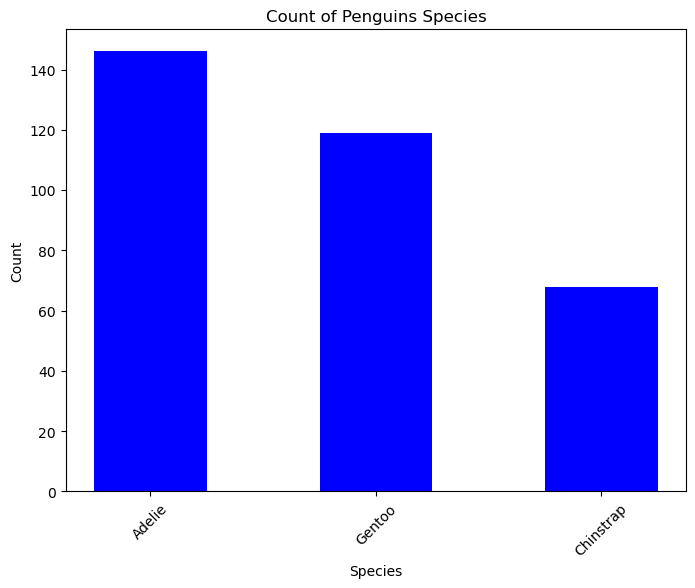

In [16]:

# We can count the number of different species and show this on a bar chart. 
# The bar chart is used to compare discrete variables and so is suitable to count the number of penguins by species in a graphical format.

species_count = df['species'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(species_count.index, species_count.values, color ='blue', width=0.5)
plt.title('Count of Penguins Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('Count of penguin Species')
plt.show()




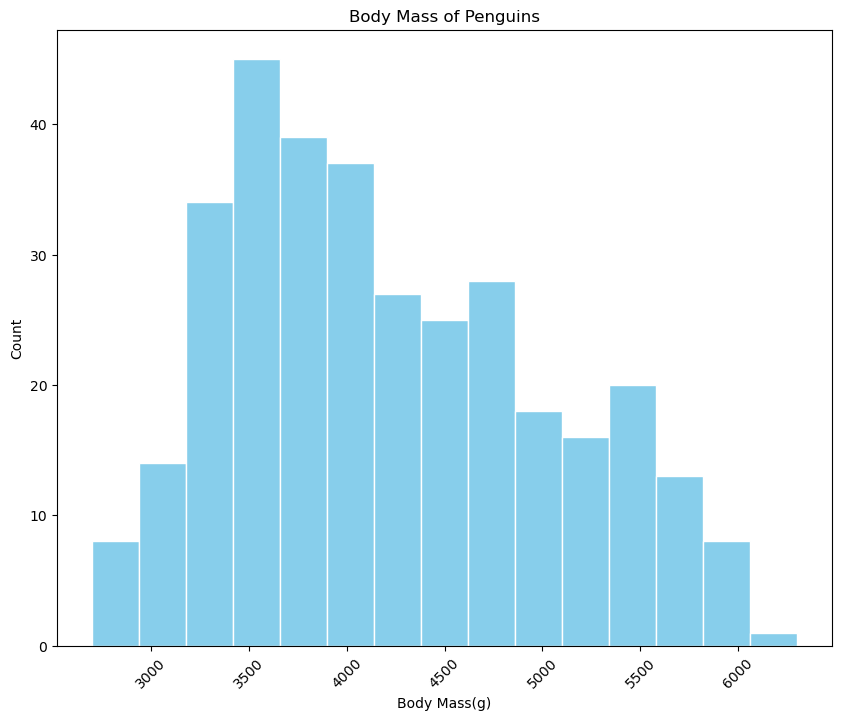

In [17]:
# Histograms can be used to show the distribution of variables and therefore suited to show one of the variables like body mass.
# It shows peaks in the data of 3250g to 4000g.


body_mass = df['body_mass_g']

plt.figure(figsize=(10, 8))
plt.hist(body_mass, color ='skyblue', bins = 15, edgecolor = 'white')
plt.title('Body Mass of Penguins')
plt.xlabel('Body Mass(g)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('Body Mass  of penguin Species')
plt.show()


## Overview Conclusion
From analysing and testing the data, we see it is mostly complete and we can start to do further analysis.


# Project 
***
In this section I will look at the variables flipper length and body mass and their correlation.
Penguins are birds and their flippers evolved from wings , they are flatter and broader and they are used to propel them through the water. The size can vary among species and can be correlated to their swimming and foraging abilities.The longer flippers may be faster and more efficient and used to dive to different depths.
Penguins with bigger body mass may have proportionally longer flippers to support their weight and propel their larger bodies through water . We will show a positive correlation between flipper length and body mass.


In [18]:
# We import seaborn library Seaborn for visualizing the explorative statistical plots of data.
import seaborn as sns


In [19]:
# We import numPy, a Python library that allows fast operation on  arrays.
import numpy as np

### Bivariate Data 
In our analysis two variables are measured. We begin by determining if there is a relationship between the two variables.
As the value of one variable changes, we see a corresponding change in the other variable

In [20]:
# A correlation exists between two variables when one of them is related to the other in someway.
# The correlation coefficient is a statistical measure of the strength and direction of a linear relationship between two variables.
# A coefficient of 1 shows a perfect positive correlation or a direct relationship. 
# The correlation coefficient between flipper length and body mass is 0.873 indicates a strong positive linear relationship 
# between the two variables


x = df['body_mass_g'].values
y = df['flipper_length_mm'].values

correlation = np.corrcoef(x, y)
print("Correlation coefficient between flipper length and body mass:", correlation)



Correlation coefficient between flipper length and body mass: [[1.        0.8729789]
 [0.8729789 1.       ]]


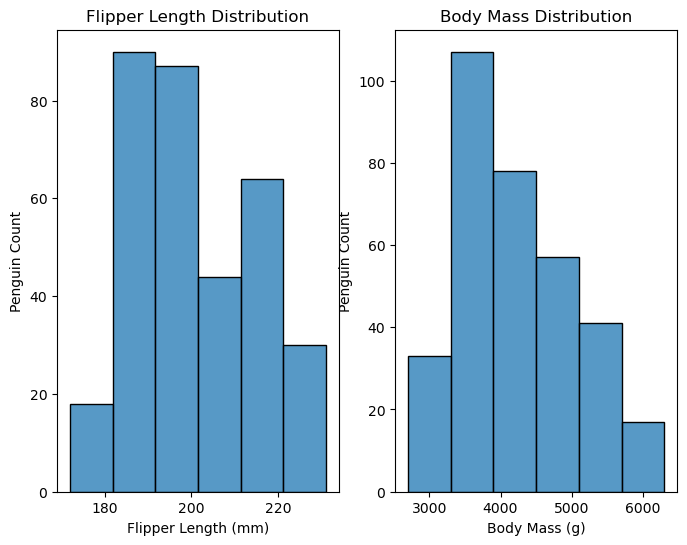

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))  

# We can plot two histograms next to each other,
# this is a good visual representation of the two variables side by side. It shows a similar distribution 
sns.histplot(df, x='flipper_length_mm', ax=axs[0], bins=6, )
axs[0].set_title('Flipper Length Distribution')
axs[0].set_xlabel('Flipper Length (mm)')
axs[0].set_ylabel('Penguin Count')

sns.histplot(df, x='body_mass_g', ax=axs[1], bins=6, )
axs[1].set_title('Body Mass Distribution')
axs[1].set_xlabel('Body Mass (g)')
axs[1].set_ylabel('Penguin Count')

plt.savefig('Histograms of Flipper length vs Body Mass of Penguin Species')
plt.show()

In [44]:
# Set colour to use within the file
species_colors = {"Chinstrap": "purple", "Gentoo": "green", "Adelie": "orange"}
sns.set_palette([species_colors["Chinstrap"], species_colors["Gentoo"], species_colors["Adelie"]])


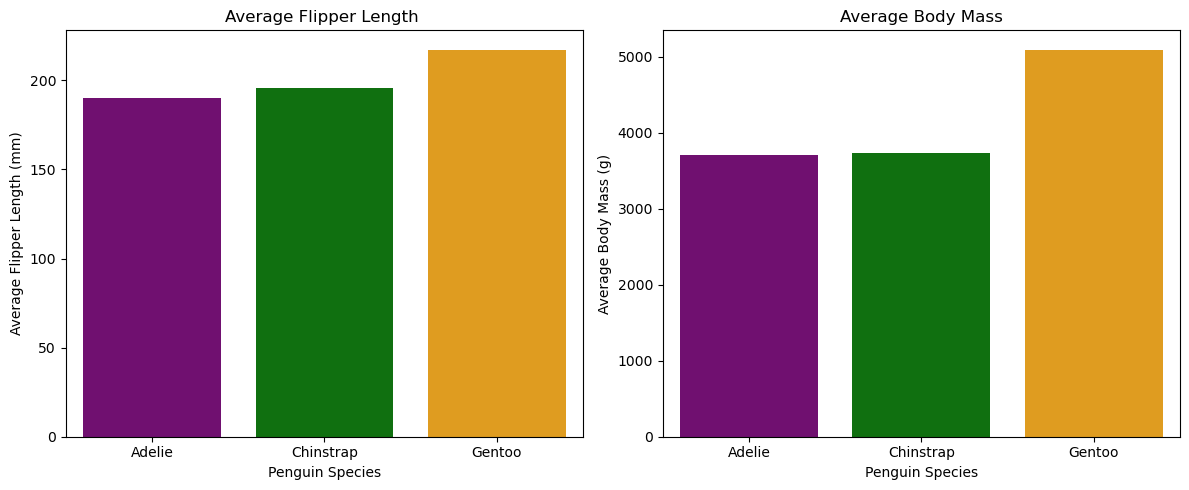

<Figure size 640x480 with 0 Axes>

In [45]:
# Prepare a bar chart side by side showing the average flipper length and average body mass of the Palmer Penguins. 

# This shows a similar picture with the Gentoo penguin standing out with the  average longer flipper length and average higher body mass. 

# it is less clear to see the difference on the body mass between the two other penguin species as from this the body mass looks similar.

penguins = df.groupby('species').agg(
    average_body_mass=('body_mass_g', 'mean'),
    average_flipper_length=('flipper_length_mm', 'mean'),
    count=('species', 'count')
).reset_index()

# Set colour to use within the file
species_colors = {"Chinstrap": "purple", "Gentoo": "green", "Adelie": "orange"}
sns.set_palette([species_colors["Chinstrap"], species_colors["Gentoo"], species_colors["Adelie"]])


# Show two separate plotes side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Plot the bar chart for average flipper length
sns.barplot(ax=axes[0], data=penguins, x='species', y='average_flipper_length')
axes[0].set_ylabel('Average Flipper Length (mm)')
axes[0].set_xlabel('Penguin Species')
axes[0].set_title('Average Flipper Length ')

# Plot the bar chart for  average body mass
sns.barplot(ax=axes[1], data=penguins, x='species', y='average_body_mass')
axes[1].set_ylabel('Average Body Mass (g)')
axes[1].set_xlabel('Penguin Species')
axes[1].set_title('Average Body Mass')

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig("Bar Charts showing Average Flipper length next to Average Body mass")


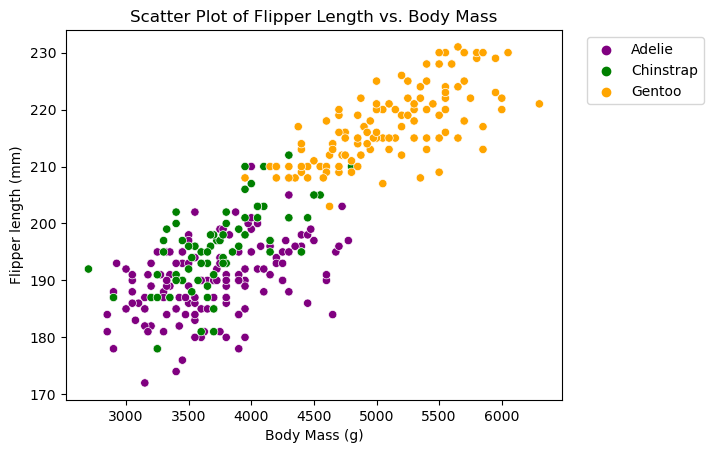

In [22]:
# A scatterplot is a graph of the paired data with a horizontal x axis and vertical y axis. 
# Each individual pair is plotted as a single point and we can see if the value of x tends to increase as y increases.
# We will show a scatter plot of the two variables 'flipper_length_mm' and 'body_mass_g'.
# We will set penguin species and their corresponding colors

# Create scatterplot
sns.scatterplot(data=df, x="body_mass_g", y="flipper_length_mm", hue="species")
plt.title("Scatter Plot of Flipper Length vs. Body Mass")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper length (mm)")
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))
plt.savefig('Scatter plot of Flipper length vs Body Mass of Penguin Species', bbox_inches='tight')
plt.show()

# We can see that there is an upward slope and straight line pattern. Positive relationships incline upwards to the right.
# The relationship is linear when the points follow a somewhat straight line.
# From this we can see that the relationship is linear . we can also gather that the gentoo are the biggest penguins with the longest flipper length.
# There is more of an overlap between Chinstrap and Adelie penguins with adelie seeming the smallest.

In [23]:
# To ignore warnings, re the figure layout changes, we import the warnings module
import warnings
warnings.filterwarnings('ignore')

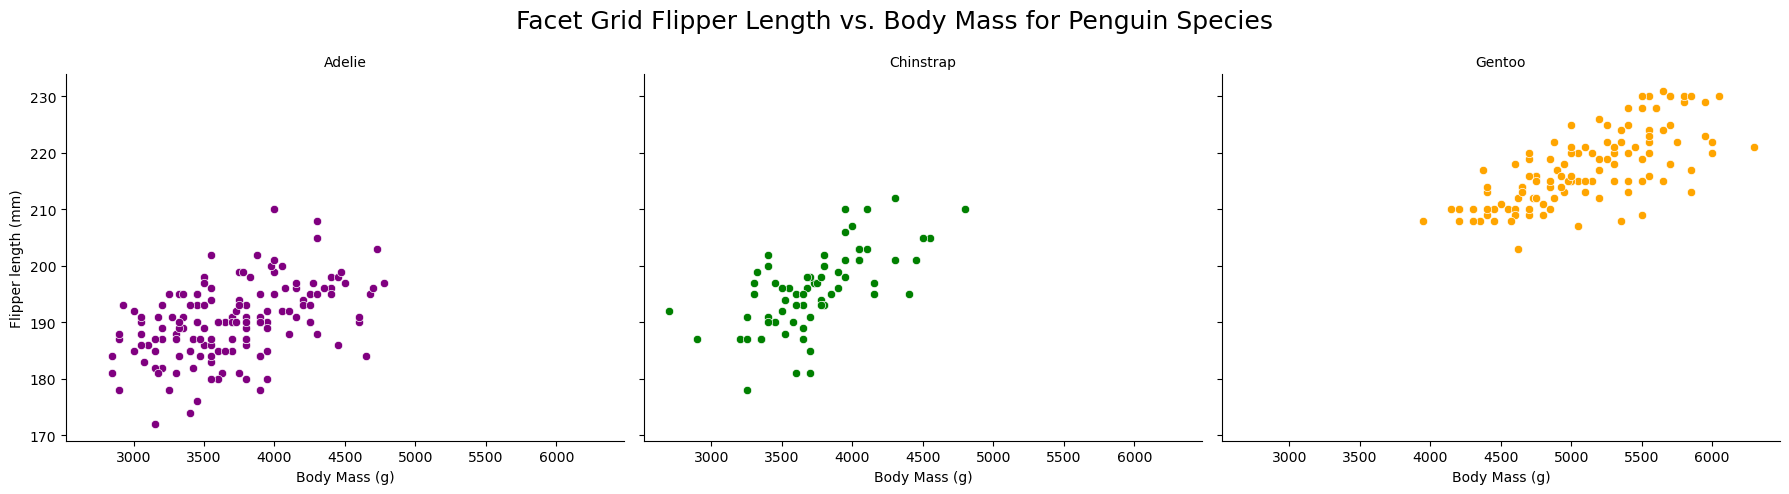

In [24]:
# We can show them separately using facet grids:
# We can define penguin species and their corresponding colors
g = sns.FacetGrid(df, col="species", hue="species", height=5, aspect=1.2)
g.map(sns.scatterplot, "body_mass_g", "flipper_length_mm")
g.set_axis_labels("Body Mass (g)", "Flipper length (mm)")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85) 
plt.suptitle("Facet Grid Flipper Length vs. Body Mass for Penguin Species", fontsize=18)
plt.savefig('Faceted Scatter plot of Flipper length vs Body Mass of Penguin Species', bbox_inches='tight')
plt.show()
# This is somewhat clearer , Gentoo has higher body mass and longer flipper length. There are less quantities of Chinstrap penguins
# but they are closer in size to Adelie penguins.

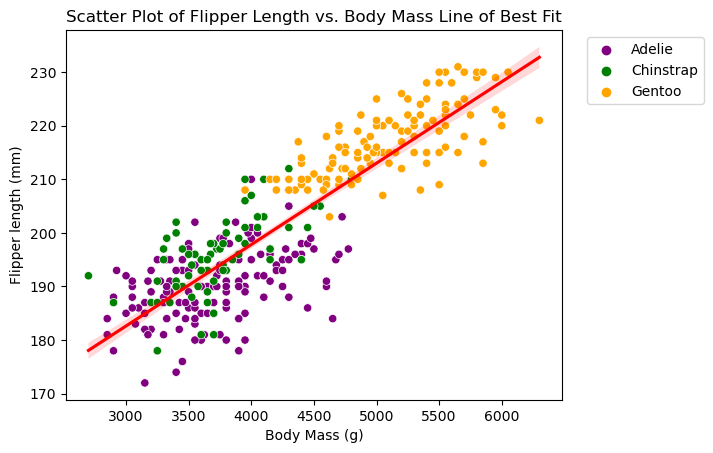

In [25]:
# We can add a line of best fit to our scatter plot to show the trend of the scattered plots.
# The line of best fit is a straight line that depicts the trend of the scattered data plots on a graph. It is also know as a trend line  
# or  line of regression. It used to show a relationship between x and y. 
# In our graph, it shows the relationship between the body mass and flipper length and shows as the body mass increases so does the flipper length.
 
# Create scatterplot
sns.scatterplot(data=df, x="body_mass_g", y="flipper_length_mm", hue="species")
# Add line of best fit
sns.regplot(data=df, x="body_mass_g", y="flipper_length_mm", scatter=False, color='red')
plt.title("Scatter Plot of Flipper Length vs. Body Mass Line of Best Fit")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper length (mm)")
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))
plt.savefig('Scatter plot of - Line of best fit Flipper length vs Body Mass', bbox_inches='tight')
plt.show()

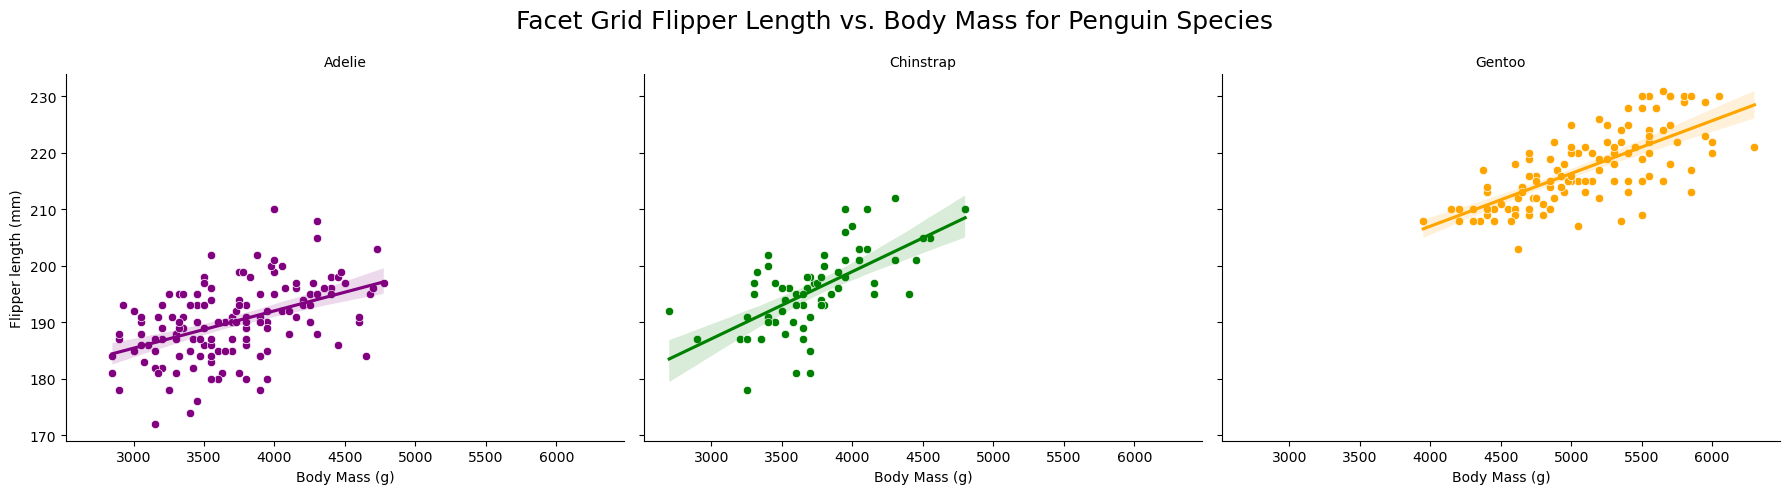

In [62]:

# We can define penguin species and their corresponding colors
g = sns.FacetGrid(df, col="species", hue="species", height=5, aspect=1.2)
g.map(sns.scatterplot, "body_mass_g", "flipper_length_mm")
g.map(sns.regplot, "body_mass_g", "flipper_length_mm", scatter=False)  # Add regression line
g.set_axis_labels("Body Mass (g)", "Flipper length (mm)")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85) 
plt.suptitle("Facet Grid Flipper Length vs. Body Mass for Penguin Species", fontsize=18)
plt.savefig('Faceted Scatter plot of Flipper length vs Body Mass of Penguin Species', bbox_inches='tight')
plt.show()

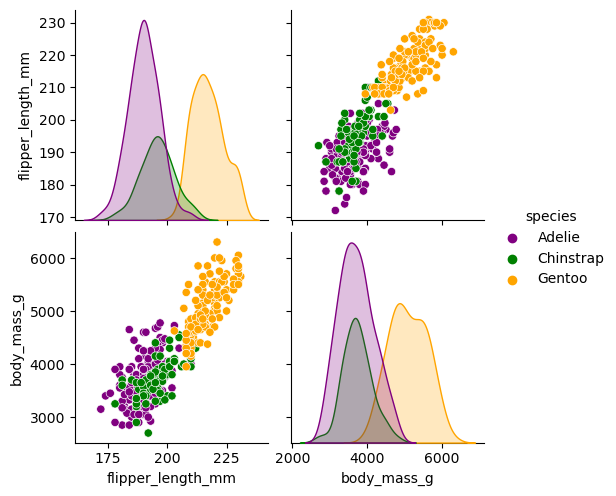

<Figure size 640x480 with 0 Axes>

In [32]:
# We can show a pairplot of the data:

sns.pairplot(df, vars=["flipper_length_mm", "body_mass_g"], hue="species")
plt.show()
plt.savefig("Pairplot Flipper length vs Body mass")

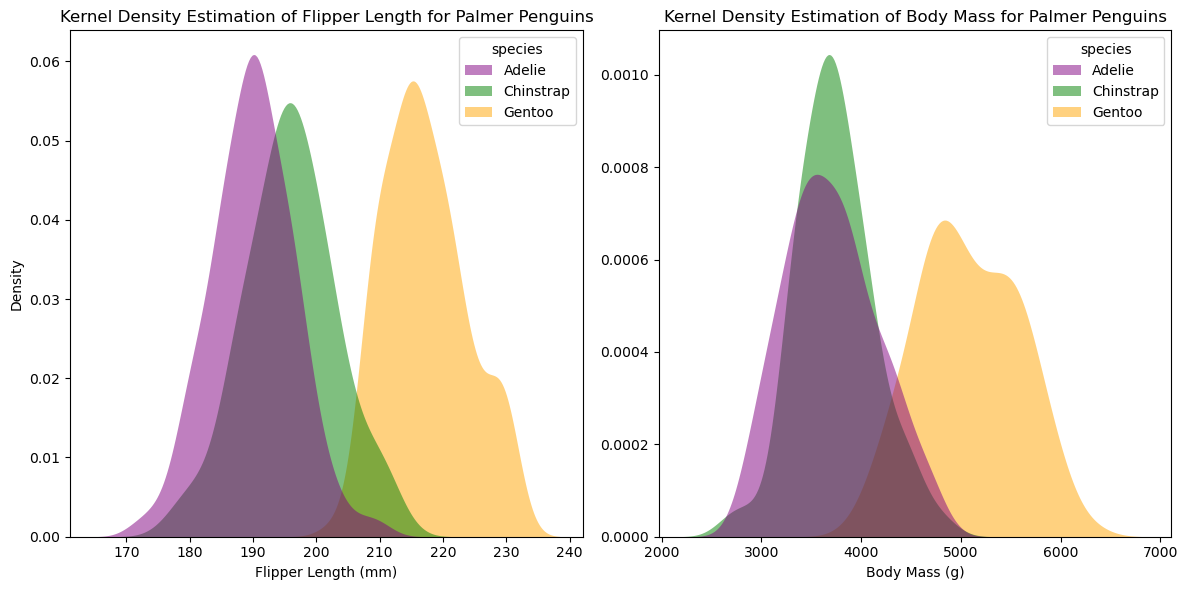

In [68]:
# Kernal Density Curves , it's a technique that let's you create a smooth curve given a set of data 
# it can be useful if you want to show the shape of some data.

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot KDE for flipper length
sns.kdeplot(df, x="flipper_length_mm", hue="species", fill=True, common_norm=False, alpha=.5, linewidth=0, ax=axes[0])
axes[0].set_xlabel("Flipper Length (mm)")
axes[0].set_ylabel("Density")
axes[0].set_title("Kernel Density Estimation of Flipper Length for Palmer Penguins")

# Plot KDE for body mass
sns.kdeplot(df, x="body_mass_g", hue="species", fill=True, common_norm=False, alpha=.5, linewidth=0, ax=axes[1])
axes[1].set_xlabel("Body Mass (g)")
axes[1].set_ylabel("")  # Clear y-label for better alignment
axes[1].set_title("Kernel Density Estimation of Body Mass for Palmer Penguins")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

***
### End
